## Project #2 - Linear and Multivariable Regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

...

## Tasks

In [54]:
# Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For splitting the data
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.linear_model import LinearRegression

# For evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Read the data from the excel file
df = pd.read_excel("LogDataProject_Cleaned_OutliersRemoved.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1059 non-null   float64
 1   DEN     1059 non-null   float64
 2   NEU     1059 non-null   float64
 3   Vp      1059 non-null   float64
dtypes: float64(4)
memory usage: 33.2 KB


### Linear Regression

In [56]:
# Define the target and the features
y = df['Vp']

X1 = df[['Vs']]
X2 = df[['DEN']]
X3 = df[['NEU']]


In [57]:
# Split the data, keep 30% for testing
X1_train, X1_test, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3)
X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3)
X3_train, X3_test, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3)

print ("Training Data", X1_train.shape)
print ("Testing Data", X1_test.shape)
print ("Total Data", df.shape)

Training Data (741, 1)
Testing Data (318, 1)
Total Data (1059, 4)


In [58]:
# Create a Regression object, used to find the optimized coefficients
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()

regressor1.fit(X1_train, y_train1)
regressor2.fit(X2_train, y_train2)
regressor3.fit(X3_train, y_train3)

# Predict the values using the optimized coefficients
y_pred1 = regressor1.predict(X1_test)
y_pred2 = regressor2.predict(X2_test)
y_pred3 = regressor3.predict(X3_test)


#### MODEL EVALUATION

In [60]:
# Vs

# Calculate the mean squared error
mse = mean_squared_error(y_test1, y_pred1) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Calculate the r-squared
r2 = r2_score(y_test1, y_pred1)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.036352975901762036
Root Mean Squared Error: 0.19066456383335115
R-Square: 0.7269244564000843


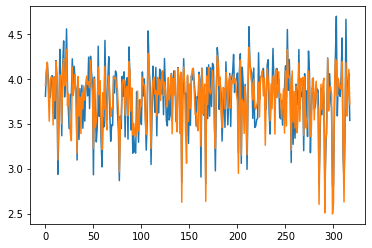

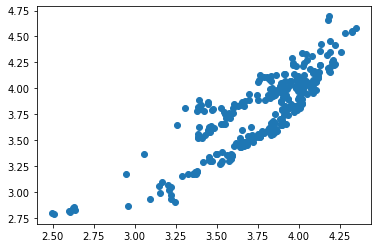

In [61]:
# Plot

# Line plot
plt.plot((np.array(y_test1)))
plt.plot(y_pred1)
plt.show()


# Scatter plot
plt.scatter(y_pred1, np.array(y_test1))

In [62]:
# DEN

# Calculate the mean squared error
mse = mean_squared_error(y_test2, y_pred2) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))

# Calculate the r-squared
r2 = r2_score(y_test2, y_pred2)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.042310665013848815
Root Mean Squared Error: 0.20569556391387933
R-Square: 0.686304964174522


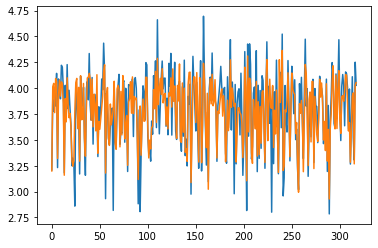

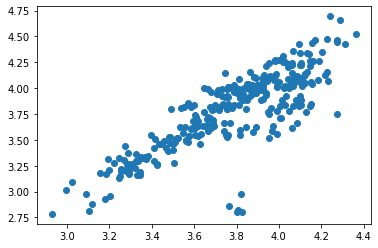

In [63]:
# Plot

# Line plot
plt.plot((np.array(y_test2)))
plt.plot(y_pred2)
plt.show()


# Scatter plot
plt.scatter(y_pred2, np.array(y_test2))

In [64]:
# NEU

# Calculate the mean squared error
mse = mean_squared_error(y_test3, y_pred3) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test3, y_pred3))

# Calculate the r-squared
r2 = r2_score(y_test3, y_pred3)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.03294747449694505
Root Mean Squared Error: 0.18151439198296385
R-Square: 0.7332439920135818


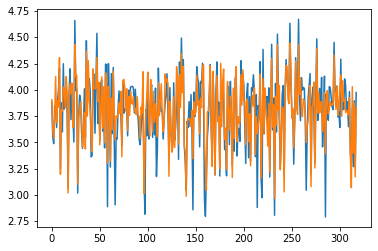

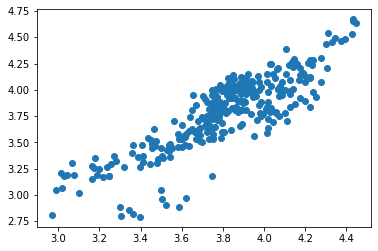

In [65]:
# Plot

# Line plot
plt.plot((np.array(y_test3)))
plt.plot(y_pred3)
plt.show()


# Scatter plot
plt.scatter(y_pred3, np.array(y_test3))

In [ ]:
# a) Linear regression modeling

# b) Multivariable regression modeling

# c) Select the best model and compute uniaxial compressive strenght (Co) with the true Vp and model estimated Vp. Plus plot the results as well

**Comments:**

### Multivariable Regression

In [66]:
# Features and target variable selection
X = df[['Vs', 'DEN', 'NEU']]
y = df['Vp']

In [67]:
# Split data and keep 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print ("Training Data", X_train.shape)
print ("Testing Data", X_test.shape)
print ("Total Data", df.shape)

Training Data (741, 3)
Testing Data (318, 3)
Total Data (1059, 4)


In [68]:
# Create a Regression object, used to find the optimized coefficients
regressor = LinearRegression()

regressor.fit(X_train, y_train)

# Predict the values using the optimized coefficients
y_pred = regressor.predict(X_test)

#### MODEL EVALUATION

In [69]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the r-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.00585042237092858
Root Mean Squared Error: 0.07648805377919207
R-Square: 0.9549148727171192


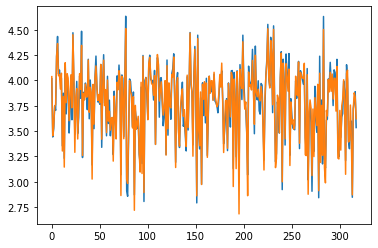

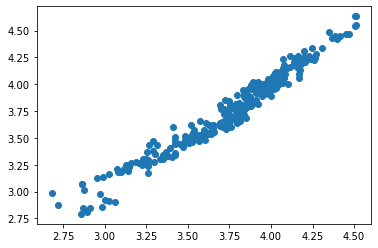

In [70]:
# Plot

# Line plot
plt.plot((np.array(y_test)))
plt.plot(y_pred)
plt.show()


# Scatter plot
plt.scatter(y_pred, np.array(y_test))

## Discussion and conclusion

...

## Reflections

...

## References

...